# 📌 Урок: Задачи оптимизации

## 📖 Теоретический минимум

### 🔹 Что такое задачи оптимизации?
Задачи оптимизации — это математические задачи, в которых необходимо найти **лучшее** (оптимальное) решение из множества возможных вариантов.

### 🔹 Классификация задач оптимизации
1. **По типу переменных:**
   - **Непрерывные** (значения переменных могут быть любыми, например, вещественные числа).
   - **Дискретные** (переменные могут принимать только целые значения).
   - **Комбинаторные** (переменные представляют собой комбинации элементов).

2. **По числу экстремумов:**
   - **Линейные** (функция и ограничения линейные).
   - **Нелинейные** (функция или ограничения нелинейные).
   - **Выпуклые** (гарантирован один глобальный минимум).
   - **Невыпуклые** (возможны локальные минимумы и максимумы).

3. **По числу критериев:**
   - **Однокритериальные** (оптимизируется одна функция).
   - **Многокритериальные** (оптимизируются сразу несколько критериев).

### 🔹 Методы решения задач оптимизации
- **Градиентные методы** (используют производные для поиска минимума/максимума).
- **Метод линейного программирования** (например, симплекс-метод).
- **Методы комбинаторной оптимизации** (жадные алгоритмы, динамическое программирование).
- **Эволюционные алгоритмы** (генетические алгоритмы, муравьиные алгоритмы).
- **Методы численной оптимизации** (например, метод Ньютона).

---

## 📖 Материалы

https://vk.com/video302513503_456239460

https://habr.com/ru/articles/474286/

https://vk.com/video121629816_456239397

Грокаем алгоритмы. Иллюстрированное пособие для программистов и любопытствующих от Бхаргава А.

https://docs.sympy.org/latest/index.html

---



# 🏆 Задания

За использование оптимизационных библиотек баллы попалам.

## 1️⃣ Минимизация функции одной переменной
Реализуйте метод **градиентного спуска** для минимизации функции:

\[
f(x) = x^2 + 4x + 4
\]

Найдите минимальное значение функции и точку, в которой оно достигается.

---


In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

Заведем функцию $f(x) = x^2  + 4x + 4$:

In [2]:
def f(x):
    return x ** 2 + 4 * x + 4

И ее производную: функцию $f'(x) = 2x + 4$:

In [3]:
def df(x):
    return 2 * x + 4

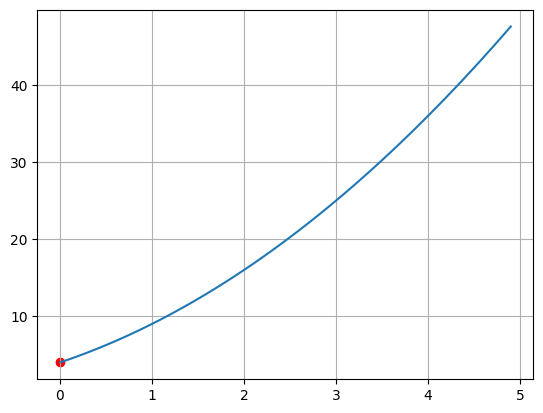

In [4]:
N = 50 # число итераций
xx = 0 # начальное значение
lmd = 0.2 # шаг сходимости

# для визуализации
x_plt = np.arange(0, 5, 0.1)
f_plt = [f(x) for x in x_plt]

plt.ion() # включение интерактивного режима (для анимашки)
fig, ax = plt.subplots() # окно и оси для графика
ax.grid(True) # включаем сетку

ax.plot(x_plt, f_plt) # отображение параболы
point = ax.scatter(xx, f(xx), c = 'r') # отображение точки красным цветом


Теперь напишем алгоритм градиентного спуска.

Напомним, как работает алгоритм градиентной оптимизации:
1. Берем случайную точку $х$ функции $f$ и фиксируем $\alpha$ и $\epsilon$
2. Вычисляем производную $f’(x)$
3. Двигаем $х$: $x_{новое} = x - \alpha⋅f’(x) $
4. Повторяем снова начиная с пункта 2 до тех пор, пока $\Delta y = y(x_{новое}) - y(x)$ не станет меньше $\epsilon$ по модулю



In [5]:
for i in range(N):
    xx = xx - lmd * df(xx) # формула град спуска

    point.set_offsets([xx, f(xx)]) # новое положение точки

    # перерисовка графика и задержка
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.02) # задержка

In [6]:
plt.ioff() # 
print(xx)
ax.scatter(xx, f(xx), c = 'b')
plt.show

-1.9999999999838345


<function matplotlib.pyplot.show(close=None, block=None)>


## 2️⃣ Оптимизация производства
Фабрика производит два вида товаров: **A** и **B**.  
Прибыль с одного товара A — **$5$**, с одного товара B — **$3$**.  
Ограничения:
- На производство A уходит **2 часа**, на B — **1 час**.
- Всего доступно **100 часов**.

Сколько товаров A и B нужно выпустить, чтобы максимизировать прибыль?  
Решите задачу линейного программирования с помощью **симплекс метода**.
За решение оптимизационными библиотеками 0,5 балла, за частное решение этой задачи 0,5 балла.

---



In [7]:
# Изначальная таблица: 
'2 1 1 100'
'-5 -3 0 0'
# Базис: s
# Уравнение: 2x + y + s = 100
# Цель: Max Z = 5x + 3y

# Шаг 1: x входит в базис
x_row = [1, 0.5, 0.5, 50]  # Нормализуем строку: делим [2,1,1,100] на 2

# Обновляем строку Z: Z + 5 * x_row
z_row = [
    -5 + 5 * x_row[0],
    -3 + 5 * x_row[1],
     0 + 5 * x_row[2],
     0 + 5 * x_row[3]
]

# Шаг 2: y входит в базис (из строки x_row)
# Нормализуем строку по y: делим x_row на 0.5
y_row = [i / 0.5 for i in x_row]

# Обновляем строку Z: Z + 0.5 * y_row
z_row = [z + 0.5 * y for z, y in zip(z_row, y_row)]

# Ответ
x = 0
y = y_row[3]
z = z_row[3]

print(f"Оптимальное решение: x = {x}, y = {y}, прибыль Z = {z}")

Оптимальное решение: x = 0, y = 100.0, прибыль Z = 300.0


In [20]:
y_row

[2.0, 1.0, 1.0, 100.0]

In [ ]:
from scipy.optimize import linprog
# linprog - функция минимизации
# Z = 5x +3y - целевая функция
# коэффициенты умножаем на -1, так как linprog минимизирует
c = [-5, -3]

# Левая часть неравенства
A = [[2, 1]]  # 2x + y <= 100

# Правая часть неравенства
b = [100]

# Границы переменных: x >= 0, y >= 0
x_bounds = (0, None)
y_bounds = (0, None)

result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')


x, y = result.x
print(f"x = {x:.2f}")
print(f"y = {y:.2f}")
print(f"Максимальная прибыль Z = {(-result.fun):.2f}")

x = 0.00
y = 100.00
Максимальная прибыль Z = 300.00


## 3️⃣ Комбинаторная оптимизация (Задача рюкзака)
Дан рюкзак ёмкостью **50 кг** и **n** предметов, каждый из которых имеет **вес** и **ценность**.  
Найти, какие предметы нужно выбрать, чтобы **максимизировать общую ценность**, не превышая ограничения по весу.

**Пример входных данных:**
```python
items = [(10, 60), (20, 100), (30, 120)]  # (вес, ценность)
capacity = 50
```
**Ожидаемый результат:**  
Оптимальный набор предметов и максимальная ценность.

---



In [ ]:
def knapsack(capacity, items):
    k = len(items)
    ks = [[0] * (capacity + 1) for i in range(k + 1)] # +1 чтобы учесть нулевую емкость и нуль предметов
    
    for i in range(1, k + 1):
        weight, value = items[i - 1]
        for w in range(capacity + 1):
            if weight > w:
                ks[i][w] = ks[i - 1][w]
            else:
                ks[i][w] = max(ks[i - 1][w], ks[i - 1][w - weight] + value)
    
    # Определяем, какие предметы включены в оптимальное решение
    w = capacity
    selected_items = []
    for i in range(k, 0, -1):
        if ks[i][w] != ks[i - 1][w]:
            selected_items.append(items[i - 1])
            w -= items[i - 1][0]
    
    return print(selected_items, ks[k][capacity])

items = [(10, 60), (20, 100), (30, 120)]
capacity = 50

knapsack(capacity, items)

[(30, 120), (20, 100)] 220


## 4️⃣ Оптимизация пути (задача коммивояжёра)
Дан граф с **n** городами и расстояниями между ними.  
Необходимо найти кратчайший путь, проходящий через все города **ровно один раз** и возвращающийся в начальную точку.

**Пример входных данных:**
```python
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]
```
**Ожидаемый результат:**  
Минимальная длина пути и порядок посещения городов.

---

In [ ]:
def factorial(n):
    if n == 0 or n == 1:
        return 1
    return n * factorial(n - 1)

def generate_permutations(arr):
    if len(arr) == 0:
        return [[]]
    result = []
    for i in range(len(arr)):
        rest = arr[:i] + arr[i+1:]
        for perm in generate_permutations(rest):
            result.append([arr[i]] + perm)
    return result

def traveling_salesman(graph):
    n = len(graph)
    min_path = float('inf')
    best_route = []
    
    cities = list(range(n))
    
    for perm in generate_permutations(cities[1:]):  # Фиксируем первый город
        route = [0] + perm + [0]  # Начинаем и заканчиваем в первом городе
        path_length = sum(graph[route[i]][route[i + 1]] for i in range(n))
        
        if path_length < min_path:
            min_path = path_length
            best_route = route
    
    return best_route, min_path


graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

optimal_route, min_distance = traveling_salesman(graph)
print(f"Оптимальный маршрут: {optimal_route}")
print(f"Минимальная длина пути: {min_distance}")


Оптимальный маршрут: [0, 1, 3, 2, 0]
Минимальная длина пути: 80



## 5️⃣ Накопленная добыча из скважины

Предположим, что дебит скважины с течением времени уменьшается по определённому закону. Темп падения дебита задан функцией \( Q(t) \), где \( t \) — время в днях, а \( Q(t) \) — дебит в кубических метрах в день на момент времени \( t \).

Для данной задачи темп падения дебита задается функцией:

$$
Q(t) = Q_0 \cdot e^{-\lambda t}
$$

где:
- \( Q_0 \) — начальный дебит (в кубических метрах в день),
- \( \lambda \) — коэффициент падения дебита (в 1/день),
- \( t \) — время (в днях).

Необходимо найти накопленную добычу за период времени от \( t = 0 \) до \( t = T \), то есть посчитать:

$$
D(T) = \int_0^T Q(t) \, dt
$$

Где \( D(T) \) — это накопленная добыча за период времени от 0 до \( T \).

**Входные данные:**
- \( Q_0 = 100 \) м³/день,
- \( lambda = 0.05 \) 1/день,
- \( T = 365 \) дней.

**Ожидаемый результат:**
Вычислить накопленную добычу \( D(T) \).


### Подсказки:
Для вычисления интеграла можно использовать интегрирование из sympy.

---


In [56]:
import sympy as sp

def cumulative_production(Q0, lmbd, T):
    t = sp.Symbol('t') # создаем переменную t
    Q_t = Q0 * sp.exp(-lmbd * t) # задаем уравнение 
    
    # Интегрируем Q(t) от 0 до T
    # Q_t - функция которую нужно проинтегрировать
    # t - переменная по которой нужно проинтегрировать 
    # 0-Т - диапазон интегрирования
    D_T = sp.integrate(Q_t, (t, 0, T))
    
    return D_T

Q0 = 100
lmbd = 0.05
T = 365

accumulated_production = cumulative_production(Q0, lmbd, T)
print(f"Накопленная добыча за {T} дней: {accumulated_production} м³")

Накопленная добыча за 365 дней: 1999.99997627776 м³
